# __Title__: __🌱 KHARIF CROP DISEASE CLASSIFICATION__

<div style="background-color: #6099d1; padding: 10px; border-radius: 8px; text-align: center;">

## 🌱 **RICE DISEASE CLASSIFICATION**  
### 🖥️🧬 Using CNN with TensorFlow

</div>


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# import train csv
train_data = pd.read_csv("./train.csv")

<div style="background-color: #6099d1; padding: 5px; border-radius: 4px; text-align: center;">

# 2.0 📊 Quick Overview of Dataset

</div>


In [3]:
# head of train data
train_data.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [4]:
# Check the shape of train data
train_data.shape

(10407, 4)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


<div style="background-color: #6099d1; padding: 5px; border-radius: 4px; text-align: center;">

# 3.1📊 Exploring the label 

</div>


In [6]:
# checking the unique values of label column
train_data["label"].unique().tolist()

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

## 📝 label Class List

| id  | class                     |
|-----|---------------------------|
| 1   | bacterial_leaf_blight      |
| 2   | bacterial_leaf_streak      |
| 3   | bacterial_panicle_blight   |
| 4   | blast                      |
| 5   | brown_spot                 |
| 6   | dead_heart                 |
| 7   | downy_mildew               |
| 8   | hispa                      |
| 9   | normal                     |
| 10  | tungro                     |


In [7]:
# checking the value counts of label column
train_data["label"].value_counts()

label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

C:\Users\saura\AppData\Local\Temp\ipykernel_14380\3266104644.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="label", palette=palette)


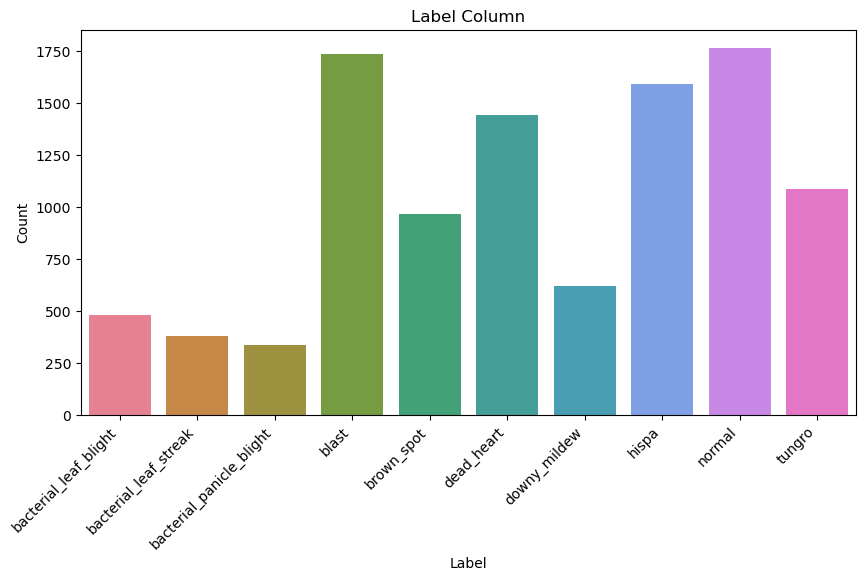

In [17]:
plt.figure(figsize=(10, 5))
plt.title("Label Column")
plt.ylabel("Count")
plt.xlabel("Label")

# Create a color palette with distinct colors
palette = sns.color_palette("husl", len(train_data["label"].unique()))

# Create the countplot with colors and rotate x-axis labels
sns.countplot(data=train_data, x="label", palette=palette)
plt.xticks(rotation=45, ha="right")  # Rotate labels 45 degrees and align right

plt.show()

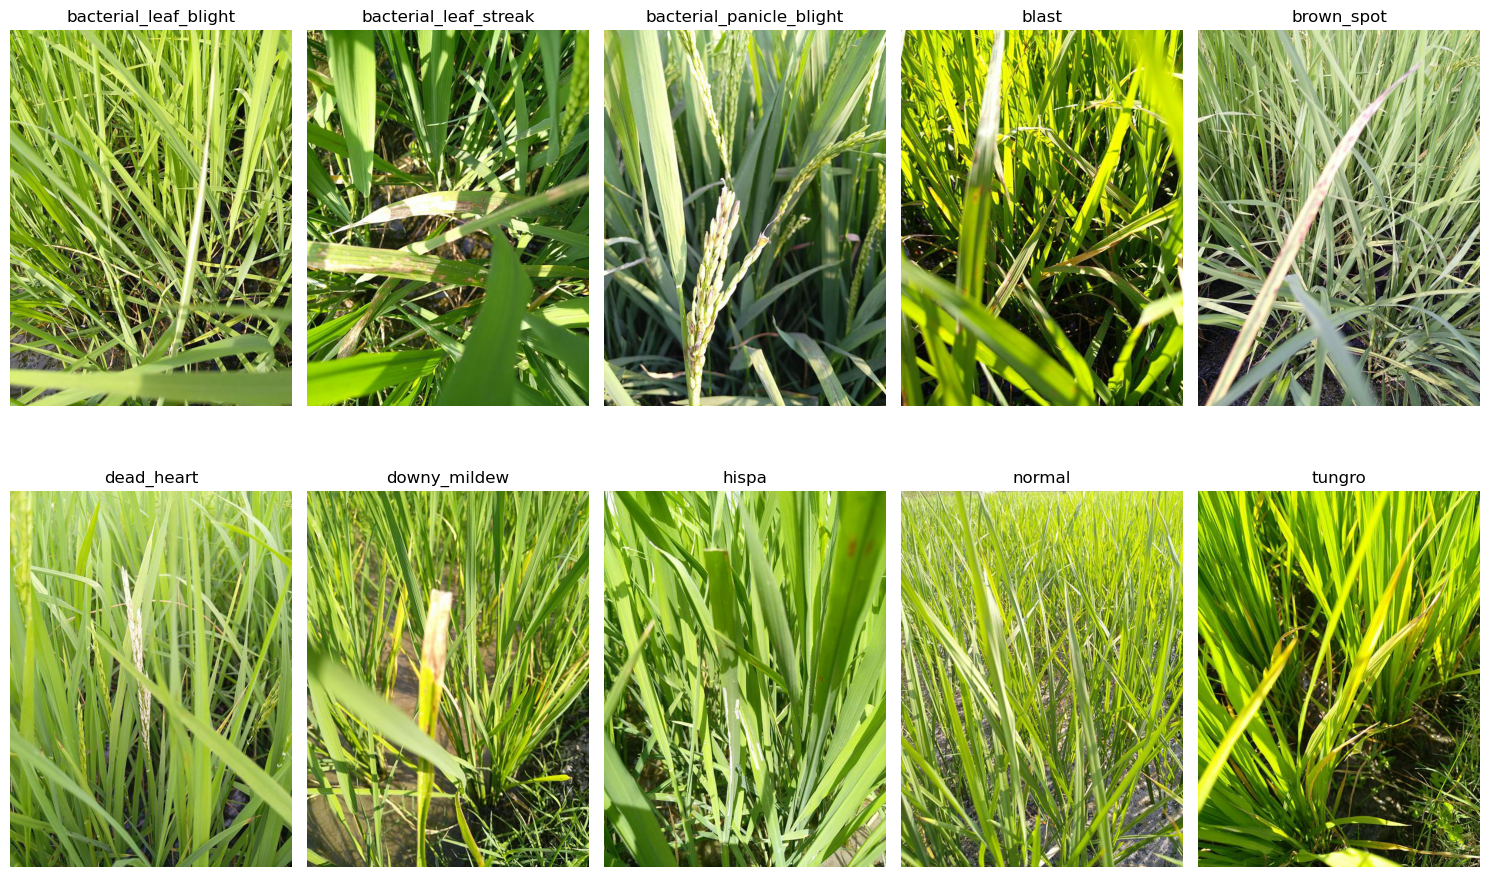

In [8]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the path to the image directory
path = "./train_images"

folder=os.listdir(path)


# List of diseases (classes)
diseases = [
    'bacterial_leaf_blight',
    'bacterial_leaf_streak',
    'bacterial_panicle_blight',
    'blast',
    'brown_spot',
    'dead_heart',
    'downy_mildew',
    'hispa',
    'normal',
    'tungro'
]

# Create a plot to display one image per disease
plt.figure(figsize=(15, 10))

for i, disease in enumerate(diseases):
    # Construct the full path to the disease directory
    disease_dir = os.path.join(path, disease)
    
    # Get the first image file from the directory
    image_file = os.listdir(disease_dir)[0]
    
    # Load the image
    image_path = os.path.join(disease_dir, image_file)
    image = Image.open(image_path)
    
    # Plot the image
    plt.subplot(2, 5, i+1)  # Adjust the layout: 2 rows, 5 columns
    plt.imshow(image)
    plt.title(disease)
    plt.axis('off')

plt.tight_layout()
plt.show()

<div style="background-color: #6099d1; padding: 5px; border-radius: 4px; text-align: center;">

# 3.2 📊 Exploring the variety 

</div>


In [9]:
train_data["variety"].value_counts()

variety
ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: count, dtype: int64

In [10]:
# checking the unique values of variety column
train_data["variety"].unique().tolist()

['ADT45',
 'IR20',
 'KarnatakaPonni',
 'Onthanel',
 'Ponni',
 'Surya',
 'Zonal',
 'AndraPonni',
 'AtchayaPonni',
 'RR']

## 📝 Variety class List

| id  | class            |
|-----|------------------|
| 1   | ADT45            |
| 2   | IR20             |
| 3   | KarnatakaPonni   |
| 4   | Onthanel         |
| 5   | Ponni            |
| 6   | Surya            |
| 7   | Zonal            |
| 8   | AndraPonni       |
| 9   | AtchayaPonni     |
| 10  | RR               |


C:\Users\saura\AppData\Local\Temp\ipykernel_6704\1110022835.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="variety", palette=palette)


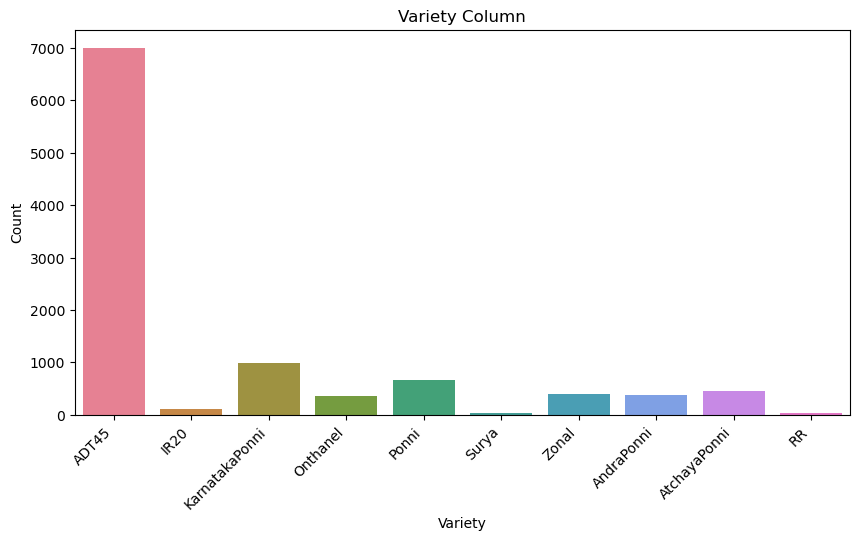

In [11]:
plt.figure(figsize=(10, 5))
plt.title("Variety Column")
plt.ylabel("Count")
plt.xlabel("Variety")

# Create a color palette with distinct colors
palette = sns.color_palette("husl", len(train_data["variety"].unique()))

# Create the countplot with colors and rotate x-axis labels
sns.countplot(data=train_data, x="variety", palette=palette)
plt.xticks(rotation=45, ha="right")  # Rotate labels 45 degrees and align right

plt.show()

In [12]:
# Checking the statistics of age
train_data["age"].describe()

count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64


<div style="background-color: #6099d1; padding: 5px; border-radius: 4px; text-align: center;">

# 4.0 🛠️ Feature Engineering 🔍

</div>


In [13]:
# encode the label and variety column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data["label"] = label_encoder.fit_transform(train_data["label"])
train_data["variety"] = label_encoder.fit_transform(train_data["variety"])


In [15]:
train_data.sample(10)

,image_id,label,variety,age
5820,101814.jpg,6,4,70
1740,104543.jpg,3,0,70
4046,107141.jpg,5,0,67
9510,102502.jpg,9,0,60
8828,107323.jpg,8,0,70
8695,102999.jpg,8,0,70
6165,106728.jpg,7,0,50
6216,109799.jpg,7,0,50
6264,101584.jpg,7,0,57
1598,100879.jpg,3,0,70



<div style="background-color: #6099d1; padding: 5px; border-radius: 4px; text-align: center;">

# 5.0 🚀 Training the Model 📈

</div>


In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    
)


Found 10407 files belonging to 10 classes.
Using 8326 files for training.


In [15]:
# Creating validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [16]:
# print image and label from train dataset
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [17]:
# normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [18]:
# normalize train dataset
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch , labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# check the minimum and maximum pixel values
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [19]:
# AutoTune
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
num_classes = len(train_data["label"].unique())
num_classes

10

In [21]:
# create model
model = tf.keras.Sequential([
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [22]:
# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Train the model with early stopping
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Set to a higher number, early stopping will halt it earlier if necessary
    callbacks=[early_stopping]  # Add early stopping callback
)


Epoch 1/10


c:\Users\saura\miniconda3\envs\Kharif_Crop_Disease_Prediction\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 99/261 [==========>...................] - ETA: 1:43 - loss: 24.4060 - accuracy: 0.1585

# Observations
1. we have 10407 ,images in the train data
2. there is no null value in train data.
3. we have 10 unique disease classes.
4. we also have 10 varites of Rice in this data.
5. we have the Rice plant age range from 45-82.
6. ADT45 have the 6992 most common value variety inside the training data.

